In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import os
from data_util import plot_with_trend, color_generator

exp_dir = 'e://data/pre'
exp_list = ['12-1-10app1', '12-2-10app1', '12-3-1app', '3-8-1app']
exp_list = ['11-28-10app1', '12-1-10app1', '12-2-10app1']
indicators_data = pickle.load(open(os.path.join(exp_dir, 'indicators_data.pkl'), 'rb'))

# plt initialization
plt.rcParams['font.sans-serif']=['SimHei']

indicators_data

,11-28-10app1,12-1-10app1,12-2-10app1,12-3-1app,3-8-1app
mem_free,"[3020164.0, 2761344.0, 2687772.0, 2674900.0, 1...","[112992.0, 130464.0, 117556.0, 153040.0, 19844...","[3539600.0, 3641128.0, 3630552.0, 3617112.0, 2...","[3303400.0, 3073588.0, 3014932.0, 3095156.0, 3...","[236716.0, 260976.0, 232448.0, 680500.0, 25516..."
mem_available,"[6728264.0, 6607312.0, 6585700.0, 6620188.0, 6...","[2126720.0, 2288224.0, 2180428.0, 2152200.0, 1...","[6533540.0, 6699348.0, 6765796.0, 6777920.0, 6...","[6521472.0, 6298672.0, 6343376.0, 6325240.0, 6...","[5122200.0, 4605816.0, 4565736.0, 5269628.0, 4..."
rss_ms,"[10772.0, 10772.0, 10772.0, 10772.0, 10772.0, ...","[9412.0, 10084.0, 10132.0, 10028.0, 9768.0, 89...","[11128.0, 11208.0, 11208.0, 11208.0, 11460.0, ...","[10704.0, 10812.0, 11032.0, 11032.0, 11092.0, ...","[2184.0, 2588.0, 2648.0, 2648.0, 2828.0, 2820...."
rss_ss,"[592012.0, 598064.0, 593412.0, 604752.0, 62471...","[702368.0, 579432.0, 568948.0, 561700.0, 58201...","[683728.0, 591624.0, 585896.0, 577736.0, 61516...","[731272.0, 616660.0, 624188.0, 629756.0, 63421...","[667356.0, 587140.0, 593384.0, 589036.0, 59654..."
rss_sf,"[33384.0, 33036.0, 33008.0, 32944.0, 33720.0, ...","[34304.0, 34156.0, 33592.0, 33600.0, 33568.0, ...","[32868.0, 32492.0, 32444.0, 32340.0, 32532.0, ...","[32200.0, 32044.0, 32124.0, 32040.0, 32552.0, ...","[36868.0, 36396.0, 36488.0, 36428.0, 36456.0, ..."
...,...,...,...,...,...
system_server Thread-908,NaN,NaN,NaN,NaN,"[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22...."
system_server Thread-910,NaN,NaN,NaN,NaN,"[28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28...."
system_server Thread-953,NaN,NaN,NaN,NaN,"[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19...."
system_server Thread-957,NaN,NaN,NaN,NaN,"[28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28...."


LT_com.heytap.browser Mann_Kendall_Test(trend='no trend', h=False, p=0.35171177111318763, z=0.9312741480008128, Tau=0.04526614310645724, s=830.0, var_s=792417.3333333334, slope=0.09031961178045515, intercept=796.8744770749665)
LT_com.heytap.browser Mann_Kendall_Test(trend='no trend', h=False, p=0.17668415876407217, z=1.351035195159804, Tau=0.06599832915622389, s=1185.0, var_s=768015.6666666666, slope=0.1875, intercept=832.78125)
LT_com.heytap.browser Mann_Kendall_Test(trend='increasing', h=True, p=0.008121271195799418, z=2.6469860131030467, Tau=0.12890603472030862, s=2339.0, var_s=780163.6666666666, slope=0.30303030303030304, intercept=841.2121212121212)
LT_com.tencent.qqmusic Mann_Kendall_Test(trend='decreasing', h=True, p=2.105147329789503e-07, z=-5.189804724214115, Tau=-0.2520178883071553, s=-4621.0, var_s=792468.3333333334, slope=-0.6827332559039876, intercept=890.7010259388308)
LT_com.tencent.qqmusic Mann_Kendall_Test(trend='decreasing', h=True, p=1.0652704365288201e-05, z=-4.4034

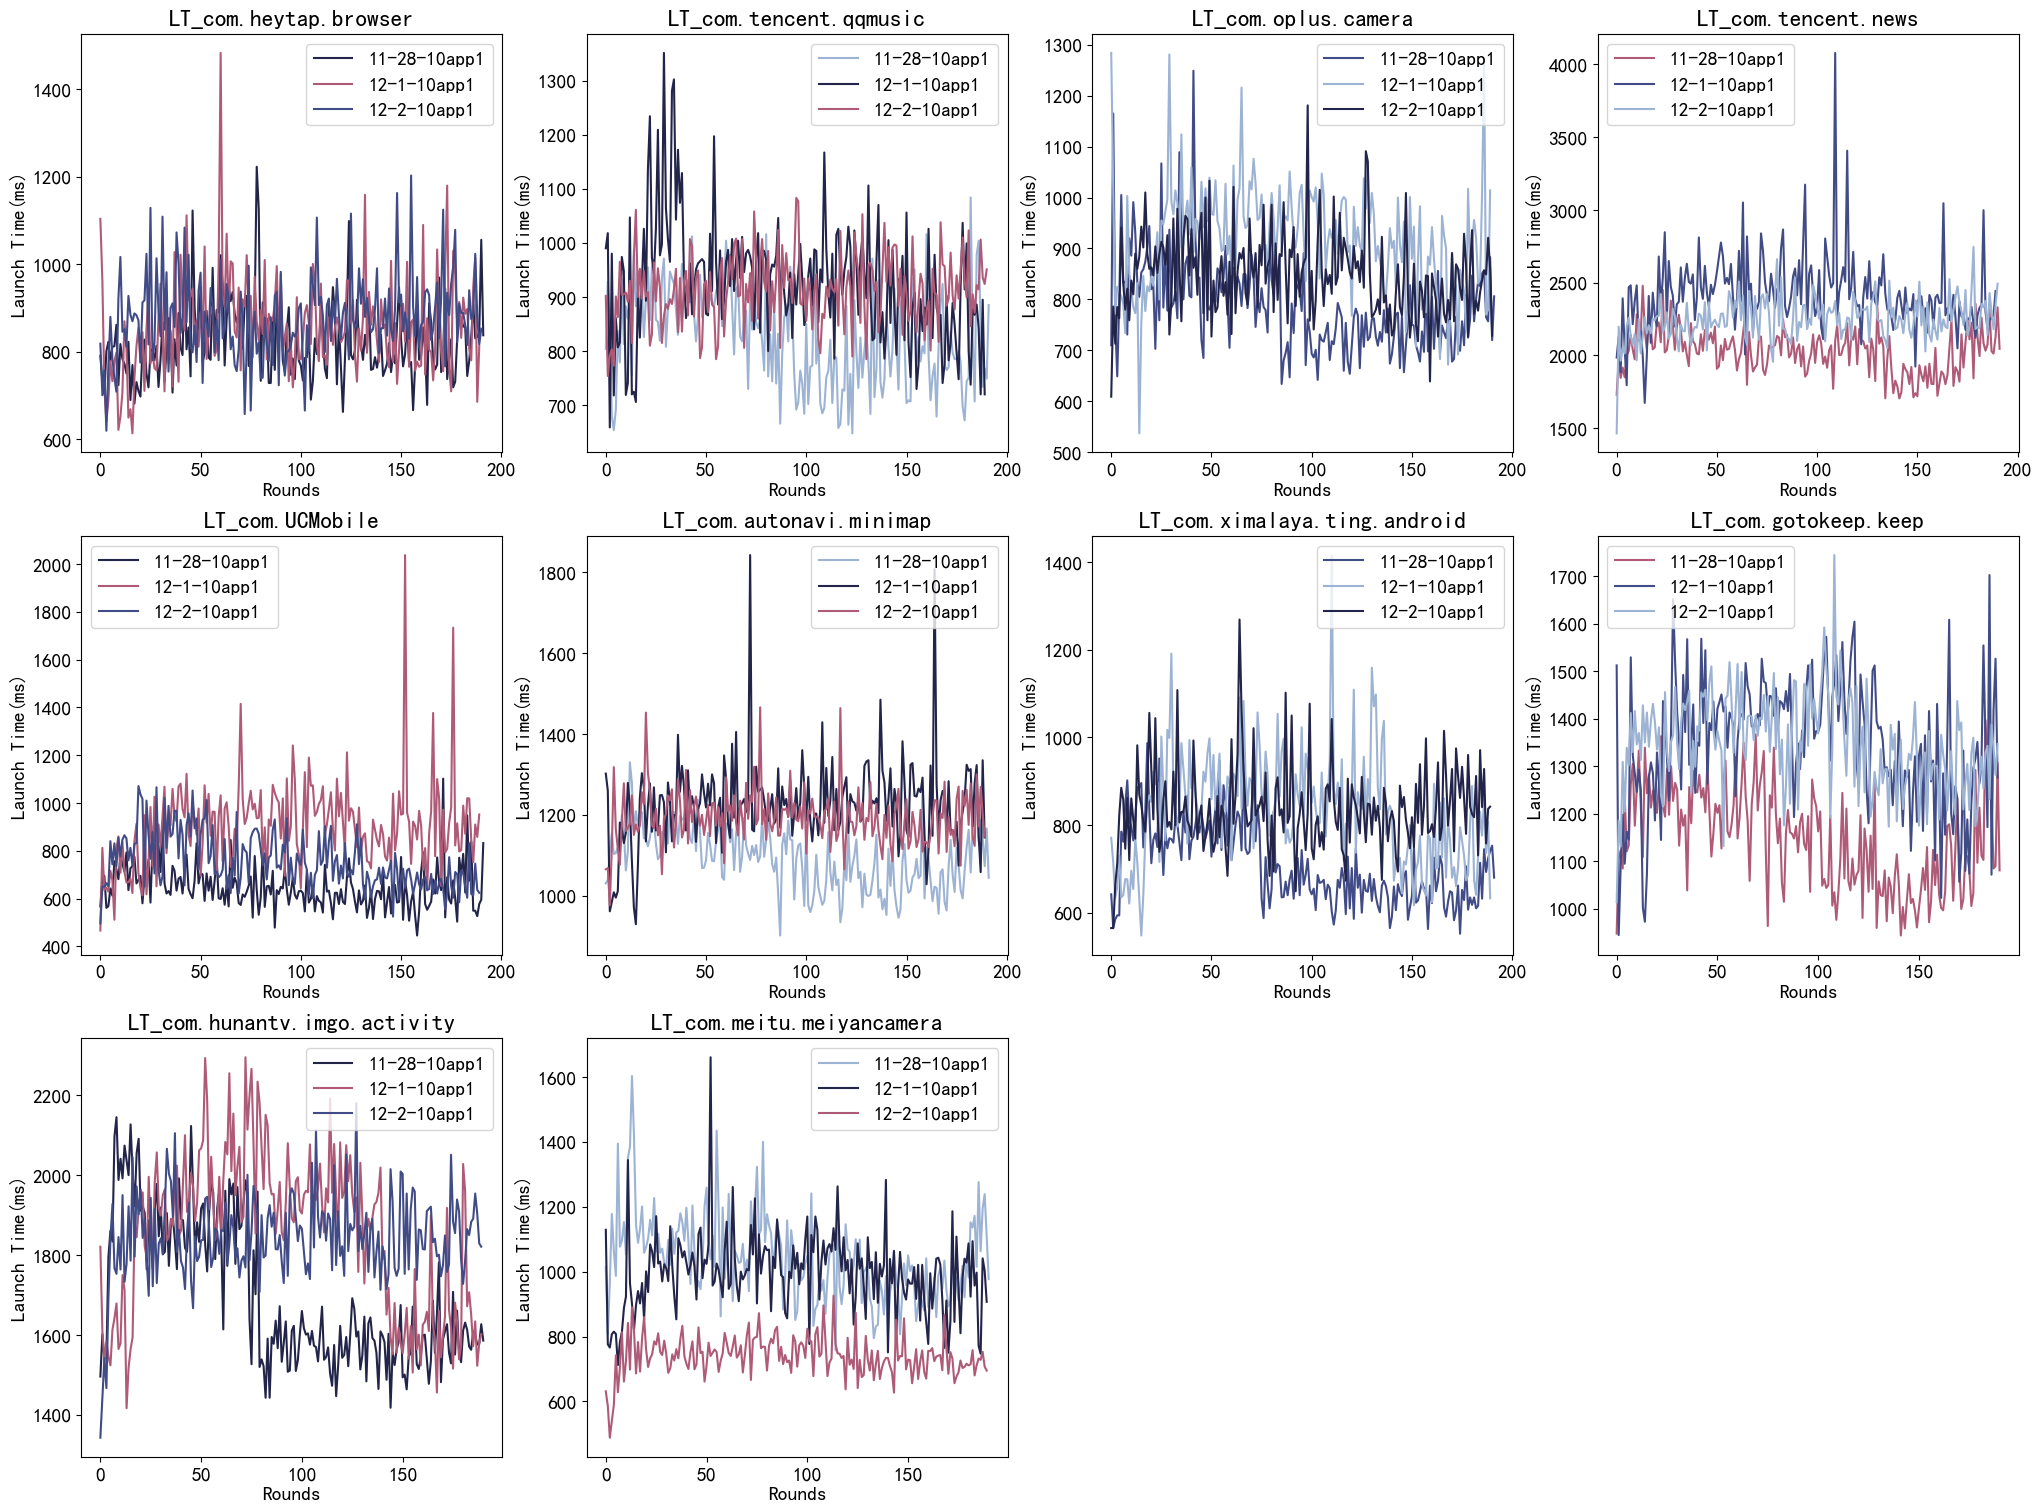

In [4]:
import pymannkendall as mk

row_names = [name for name in list(indicators_data.index) if name.startswith('LT_')]
plt.rcParams.update({'font.size': 14})
plt.figure(figsize = (25, 25))
gen = color_generator(theme='ayaka')
for i, row_name in enumerate(row_names):
    from math import sqrt, ceil
    plt.subplot(ceil(sqrt(len(row_names))), ceil(sqrt(len(row_names))), i+1)
    plt.title(row_name)
    for exp in exp_list:
        if isinstance(indicators_data[exp][row_name], list):
            plt.plot(range(len(indicators_data[exp][row_name])), indicators_data[exp][row_name], color=next(gen), label=exp)
            print(row_name, mk.original_test(indicators_data[exp][row_name]))
    # plt.ylim([0, 12])
    plt.xlabel('Rounds')
    plt.ylabel('Launch Time(ms)')
    plt.legend()


SignificanceResult(statistic=0.06397205326157357, pvalue=0.3805553080488482)


Text(0.5, 1.0, 'Launch Time and Process Clear Metrics')

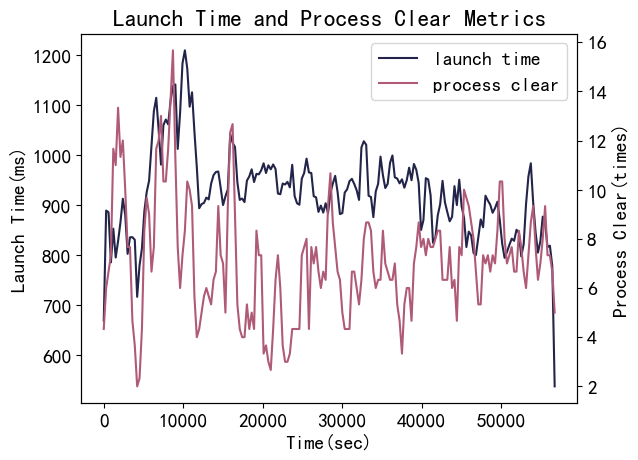

In [76]:
lt_data = indicators_data['12-1-10app1']['LT_com.tencent.qqmusic']
clear_data = indicators_data['12-1-10app1']['athena_process_clear_metrics']
import numpy as np
from scipy.stats import spearmanr
print(spearmanr(lt_data, clear_data))
smoothen = lambda y, window=3: np.convolve(y, np.ones(window) / window, mode='same')
# 创建第一个轴并绘制第一组数据
fig, ax1 = plt.subplots()
ax1.plot(range(0, 300*len(lt_data), 300), smoothen(lt_data), color=next(gen), label='launch time')
ax1.set_xlabel('Time(sec)')
ax1.set_ylabel('Launch Time(ms)')

# 创建第二个轴并绘制第二组数据
ax2 = ax1.twinx()
ax2.plot(range(0, 300*len(clear_data), 300), smoothen(clear_data), color=next(gen), label='process clear')
ax2.set_ylabel('Process Clear(times)')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper right')
plt.title('Launch Time and Process Clear Metrics')

# plt.subplot(211)
# plt.plot(range(len(lt_data)), lt_data, color=next(gen), label=exp)
# plt.subplot(212)
# plt.plot(range(len(clear_data)), clear_data, color=next(gen), label=exp)
# plt.ylim([0, 20])
# len(lt_data)

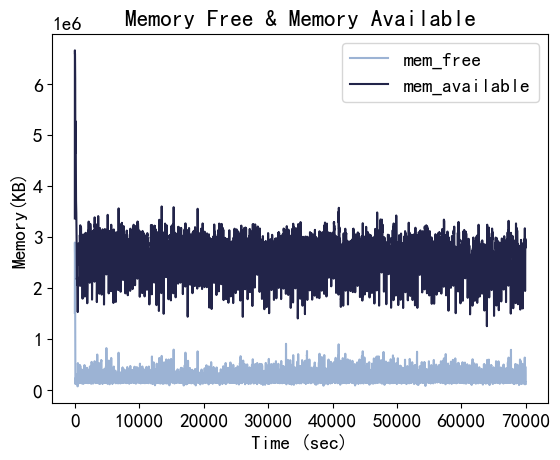

In [97]:
plt.plot(range(0, 10*len(indicators_data['11-28-10app1']['mem_free'][0:7000]), 10), smoothen(indicators_data['11-28-10app1']['mem_free'][0:7000], 2),color=next(gen), label='mem_free')
plt.plot(range(0, 10*len(indicators_data['11-28-10app1']['mem_available'][0:7000]), 10), smoothen(indicators_data['11-28-10app1']['mem_available'][0:7000], 2),color=next(gen), label='mem_available')
plt.xlabel('Time (sec)')
plt.ylabel('Memory(KB)')
plt.title('Memory Free & Memory Available')
plt.legend()

Text(0, 0.5, 'Memory(KB)')

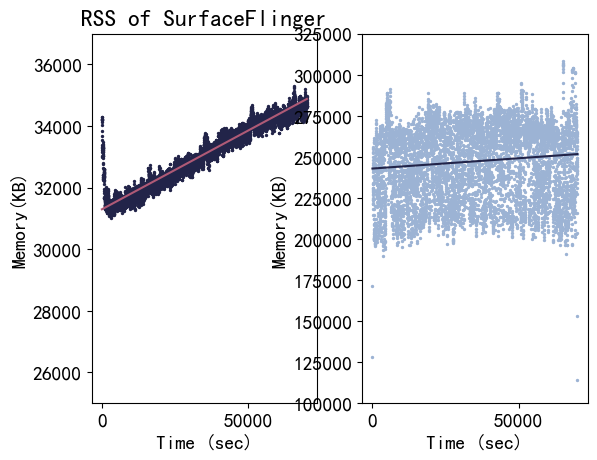

In [123]:
import pymannkendall as mk
def plot_with_trend(data, label=None):
    if isinstance(data, str):
        data = ast.literal_eval(data)
    mk_res = mk.original_test(data)
    x_len = len(data)
    x = np.linspace(0, 10*(x_len - 1), 100)
    y = mk_res.slope * x/10 + mk_res.intercept
    gen = color_generator()
    plt.scatter(range(0, len(data)*10, 10), data, label=label, color=next(gen), s = 2)
    plt.plot(x, y, color=next(gen))

plt.subplot(121)    
plot_with_trend(smoothen(indicators_data['11-28-10app1']['rss_sf'][0:7000], 2), label='SurfaceFlinger')
plt.ylim([25000, 37000])
plt.xlabel('Time (sec)')
plt.ylabel('Memory(KB)')
plt.title('RSS of SurfaceFlinger')
plt.subplot(122)    
plot_with_trend(smoothen(indicators_data['12-1-10app1']['rss_ui'][0:7000], 5), label='SystemUI')
plt.ylim([100000, 325000])
plt.xlabel('Time (sec)')
plt.ylabel('Memory(KB)')

Text(0.5, 1.0, 'Garbage Collection Time of System Server')

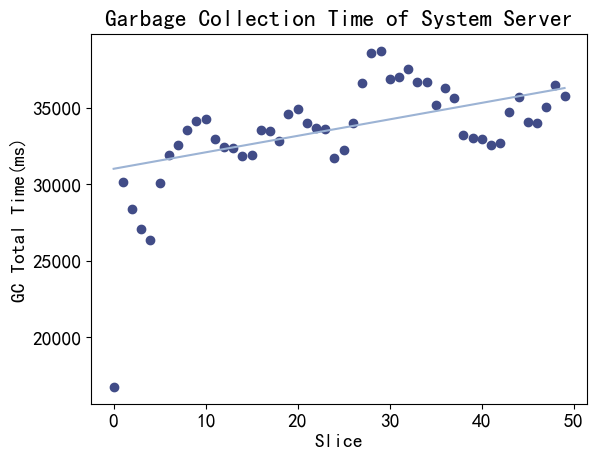

: 

In [135]:
data_util.plot_with_trend(smoothen(indicators_data['12-1-10app1']['system_server'][0:7000], 2), label='SystemUI')
plt.xlabel('Slice')
plt.ylabel('GC Total Time(ms)')
plt.title('Garbage Collection Time of System Server') 

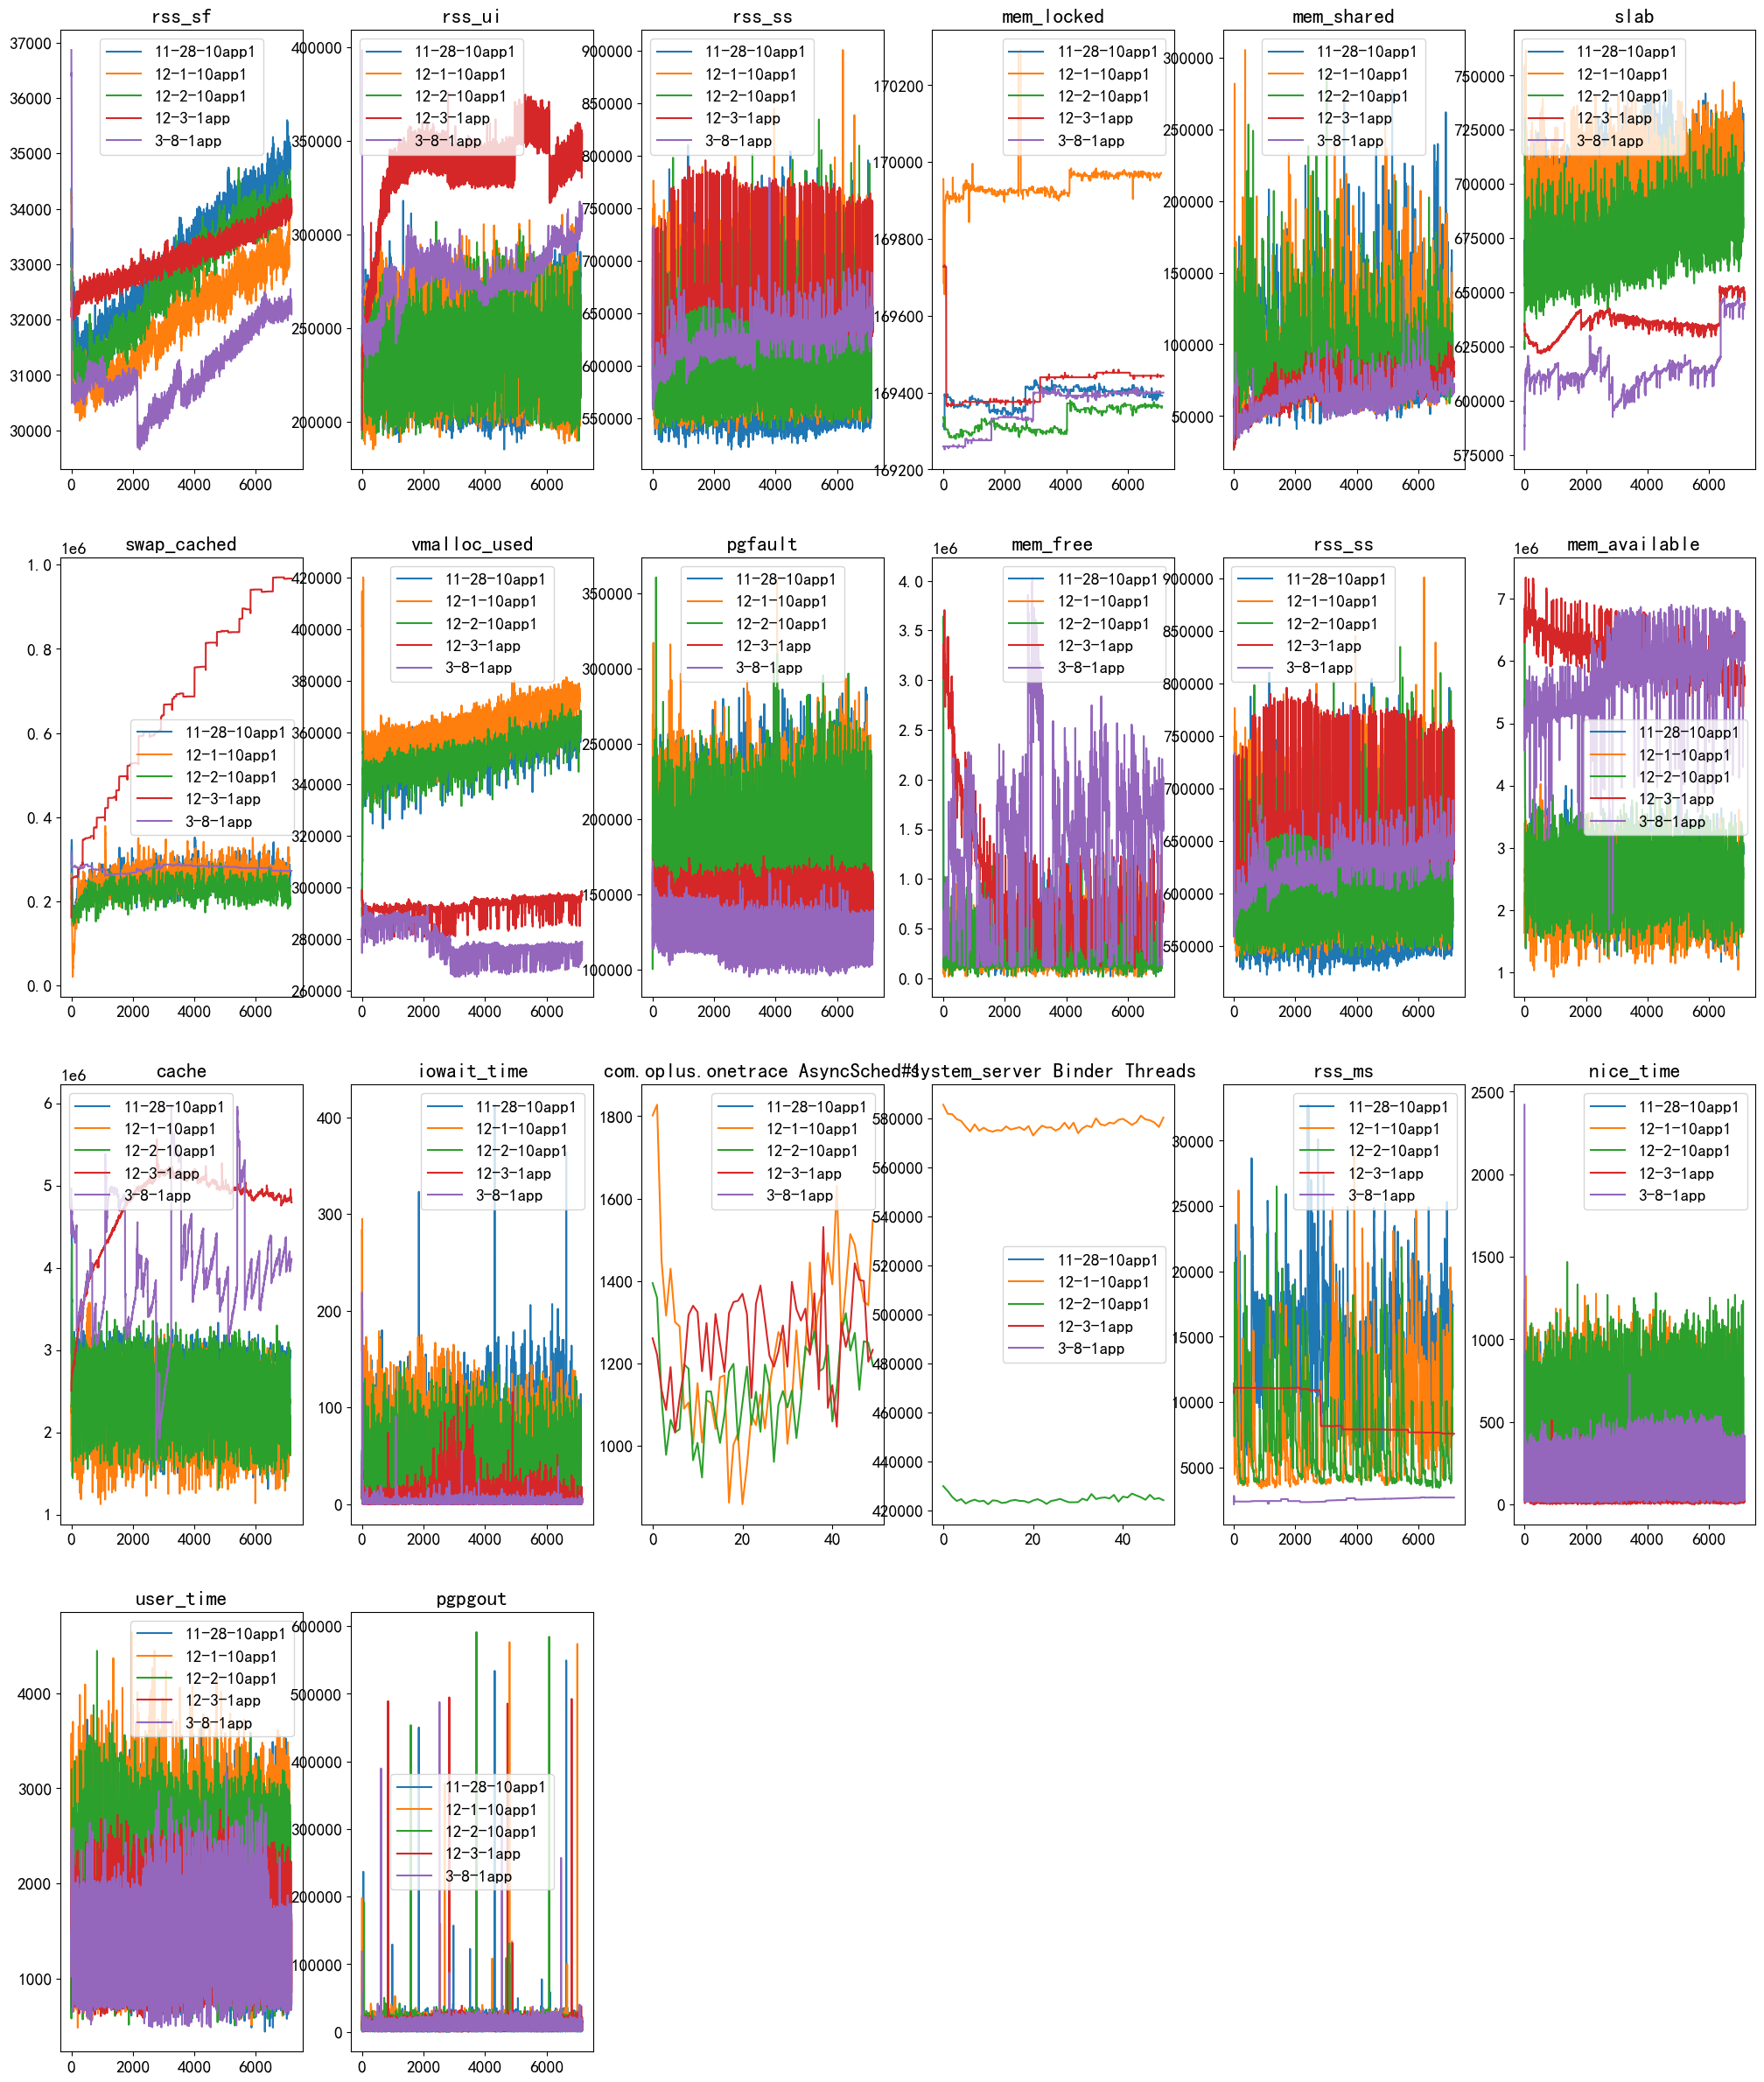

In [56]:
import data_util
# indicators_user = ['athena_process_clear_metrics']
indicators_sys = [
                    'rss_sf',
                    'rss_ui',
                    'rss_ss',
                    'mem_locked',
                    'mem_shared',
                    'slab',
                    'swap_cached',
                    'vmalloc_used',
                    'pgfault',
                    'mem_free',
                    'rss_ss',
                    'mem_available',
                    'cache',
                    'iowait_time',
                    'com.oplus.onetrace AsyncSched#1',
                    'system_server Binder Threads',
                    'rss_ms',
                    'nice_time',
                    'user_time',
                    'pgpgout',
                ]
plt.figure(figsize=(25, 30))
for index, indicator in enumerate(indicators_sys):
    plt.subplot(4,6,index+1)
    plt.title(indicator)
    for col_name, data in indicators_data.loc[indicator].items():
        # if col_name in exp_list:
            plt.plot(data, label=col_name)
            plt.legend()

In [34]:
from scipy.stats import spearmanr

def corr_to_sys(user_indicator):
    corr = pd.DataFrame(index=indicators_sys, columns=indicators_data.columns)
    for exp_name, exp_data in indicators_data.iteritems():
        for indicator in indicators_sys:
            n = min(len(exp_data[user_indicator]), len(exp_data[indicator]))
            corr.loc[indicator, exp_name] = spearmanr(exp_data[user_indicator][:n], exp_data[indicator][:n]).correlation
    return corr

corr_to_sys('LT_40')

,2-21-10app1,2-27-10app1,3-1-10app1-modified,4-6-10app2,3-8-10app2,3-13-10app3,3-19-10app3,3-20-10app3
slab,0.026432,0.523846,0.19913,0.442609,-0.353077,0.383932,0.325123,-0.419231
com.android.systemui HeapTaskDaemon,0.084505,0.127717,0.128289,-0.257503,-0.299346,0.028376,-0.448611,-0.605233
com.android.systemui,0.199083,0.757692,0.447826,0.346957,0.421538,0.658803,0.405583,-0.310769
vmalloc_used,0.013598,0.485385,0.242609,0.098261,-0.006154,0.382564,0.345922,-0.53
pgmajfault,0.236965,0.132174,0.213439,0.43083,-0.378261,-0.088462,-0.043346,-0.252174
com.android.systemui ndroid.systemui,-0.157714,-0.142747,0.289565,-0.488696,-0.506154,-0.122735,-0.639934,-0.710906
system_server HeapTaskDaemon,-0.534607,-0.493077,0.055652,-0.050435,-0.577692,0.063248,-0.591133,-0.847692
rss_ms,-0.169748,-0.230769,-0.22087,0.186087,-0.177692,0.362051,0.045977,-0.197692
surfaceflinger surfaceflinger,-0.59673,-0.628462,0.122609,-0.817391,-0.278515,-0.479658,-0.636015,-0.906154
system_server android.anim,-0.685003,-0.622308,0.072174,-0.791214,-0.29121,-0.365191,-0.538388,-0.876707
